# Stock Price Prediction Using Linear Regression

### Importing Required Libraries

In [ ]:
#Importing Libraries

import numpy as np
import pandas as pd

#For Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split

#Feature Scaling
from sklearn.preprocessing import StandardScaler

#For Fitting
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline
#ignore any warnings
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [3]:
data = pd.read_csv("../input/tesla-latest-stock-data-2010-2020/TSLA.csv")

### Let's See The Data

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
1,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
3,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
4,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2579 non-null   object 
 1   Open       2579 non-null   float64
 2   High       2579 non-null   float64
 3   Low        2579 non-null   float64
 4   Close      2579 non-null   float64
 5   Adj Close  2579 non-null   float64
 6   Volume     2579 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 141.2+ KB


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2.579000e+03
mean,49.206686,50.301806,48.073117,49.253279,49.253279,3.078217e+07
std,57.934102,59.888383,55.852349,58.119783,58.119783,2.855717e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,7.159000,7.268000,6.989000,7.153000,7.153000,1.047400e+07
50%,44.001999,44.660000,43.301998,43.924000,43.924000,2.413100e+07
75%,59.339000,60.171000,57.841000,59.020001,59.020001,3.979150e+07
max,502.140015,502.489990,470.510010,498.320007,498.320007,3.046940e+08


In [21]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [23]:
data.duplicated().sum()

0

In [24]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [26]:
df=data

In [27]:
# check outliers
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for col in columns:
    # calculate interquartile range
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( df[col] < lower) | (df[col] > upper) )
    index_label = df[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    #df.drop(index_label, inplace=True)

Number of outliers in Open: 138
Number of outliers in High: 139
Number of outliers in Low: 138
Number of outliers in Close: 138
Number of outliers in Adj Close: 138
Number of outliers in Volume: 154


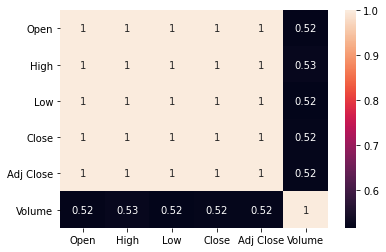

In [30]:
sns.heatmap(data.corr(),annot=True)

In [31]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999336,0.999139,0.998581,0.998581,0.520234
High,0.999336,1.000000,0.998967,0.999401,0.999401,0.525483
Low,0.999139,0.998967,1.000000,0.999197,0.999197,0.516526
Close,0.998581,0.999401,0.999197,1.000000,1.000000,0.520347
Adj Close,0.998581,0.999401,0.999197,1.000000,1.000000,0.520347
Volume,0.520234,0.525483,0.516526,0.520347,0.520347,1.000000


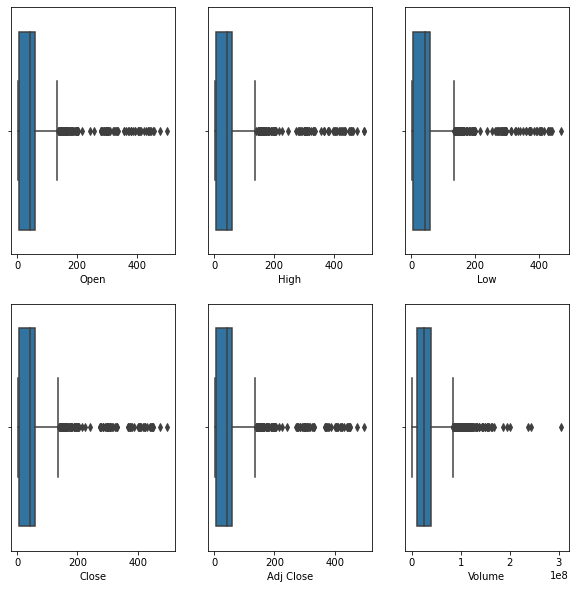

In [32]:
fig,ax = plt.subplots(2,3,figsize=(10,10))
sns.boxplot(x='Open',data=df,ax=ax[0][0])
sns.boxplot(x='High',data=df,ax=ax[0][1])
sns.boxplot(x='Low',data=df,ax=ax[0][2])
sns.boxplot(x='Close',data=df,ax=ax[1][0])
sns.boxplot(x='Adj Close',data=df,ax=ax[1][1])
sns.boxplot(x='Volume',data=df,ax=ax[1][2])

In [36]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

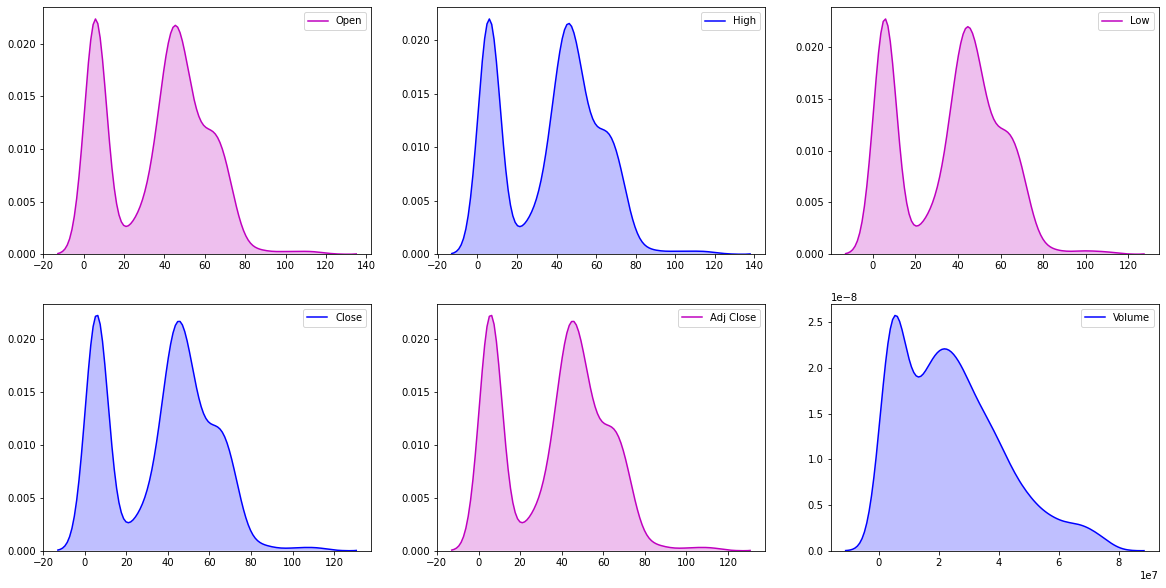

In [37]:
fig,ax = plt.subplots(2,3,figsize=(20,10))
sns.kdeplot(df['Open'], shade=True, color='m',ax=ax[0][0])
sns.kdeplot(df['High'], shade=True, color='b',ax=ax[0][1])
sns.kdeplot(df['Low'], shade=True, color='m',ax=ax[0][2])
sns.kdeplot(df['Close'], shade=True, color='b',ax=ax[1][0])
sns.kdeplot(df['Adj Close'], shade=True, color='m',ax=ax[1][1])
sns.kdeplot(df['Volume'], shade=True, color='b',ax=ax[1][2])

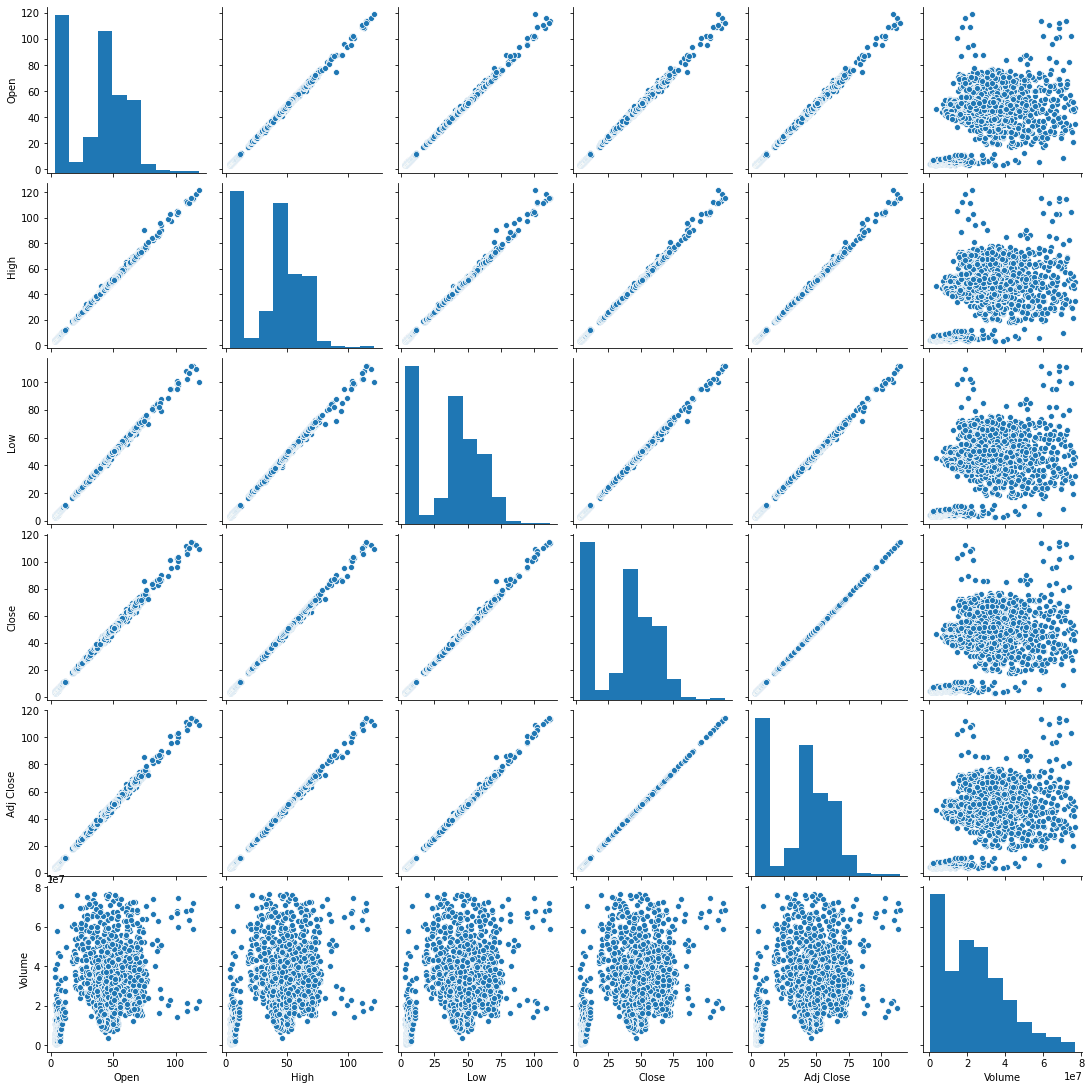

In [38]:
sns.pairplot(df)

In [33]:
df.shape

(2579, 7)

In [34]:
# check outliers
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for col in columns:
    # calculate interquartile range
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( df[col] < lower) | (df[col] > upper) )
    index_label = df[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    df.drop(index_label, inplace=True)

Number of outliers in Open: 138
Number of outliers in High: 8
Number of outliers in Low: 0
Number of outliers in Close: 0
Number of outliers in Adj Close: 0
Number of outliers in Volume: 110


In [35]:
df.shape

(2323, 7)

### Separate the Input and Output Columns

In [7]:
X = data[['High','Low','Open','Volume']].values
y = data['Close'].values

In [8]:
X

array([[6.08400000e+00, 4.66000000e+00, 5.15800000e+00, 8.59355000e+07],
       [5.18400000e+00, 4.05400000e+00, 5.00000000e+00, 4.10940000e+07],
       [4.62000000e+00, 3.74200000e+00, 4.60000000e+00, 2.56990000e+07],
       ...,
       [4.12149994e+02, 3.75880005e+02, 4.05160004e+02, 9.50742000e+07],
       [3.99500000e+02, 3.51299988e+02, 3.63799988e+02, 9.65611000e+07],
       [4.08730011e+02, 3.91299988e+02, 3.93470001e+02, 6.70684000e+07]])

In [9]:
y

array([  4.766   ,   4.392   ,   3.84    , ..., 380.359985, 387.790009,
       407.339996])

### Spliting the Train and Test data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

### Linear Regression Model

In [11]:
regressor = LinearRegression()

### Fitting the data in the Model

In [12]:
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
print(regressor.coef_)

[ 8.87095614e-01  5.85513083e-01 -4.76088446e-01 -1.00579988e-08]


In [14]:
print(regressor.intercept_)

0.21562506803994097


### Prediction

In [15]:
predicted = regressor.predict(X_test)

In [16]:
print(predicted)

[ 48.28710377   5.46796474  67.81519558   6.68986368  50.57475389
  50.15802018  41.85593245  24.42517645  49.54803051  43.90230937
 298.79298491  37.51402064   7.85499938  43.74164349  54.54668473
   4.86374123  43.05771831  62.23745654   6.62671137  50.86453905
 162.17778438  54.01208146  26.89490796  17.34867616  67.53108095
  45.30737392  72.83821008  49.06133251 143.27239733  51.92928264
  50.70256477  29.52666431  49.57760378  47.45345367  32.76661722
 155.0533991   62.70618124   4.36559773  43.69638043  27.58513271
  58.69012648  38.24953676  38.95889793  38.59116288  23.66760729
  39.00734264   3.45184405  40.98080408   8.01183053  52.44962283
   3.97031792   5.74775758   3.01063992  42.26288089  33.17485593
   7.30407959   7.21164417  49.53701516 449.58142711   8.24903154
 130.87602639  47.09386717  70.10875987  41.83007477  43.81371492
  55.29270419 126.86476191  64.01792297  48.65801981  67.90733784
   5.13970989  58.15189852  39.66296044  41.28471972   6.80734248
  37.21190

### Combine the Actual and Predicted data

In [17]:
data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})

In [18]:
data1.head(20)

,Actual,Predicted
0,48.598000,48.287104
1,5.348000,5.467965
2,68.570000,67.815196
3,6.430000,6.689864
4,49.812000,50.574754
5,50.004002,50.158020
6,41.400002,41.855932
7,24.690001,24.425176
8,49.785999,49.548031
9,43.472000,43.902309


### Mean Absolute Error

In [20]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))
print("r2_score:",metrics.r2_score(y_test,predicted))

Mean Absolute Error: 0.46916068303975095
Mean Squared Error: 0.9033937308800454
Root Mean Squared Error: 0.9504702682777855
r2_score: 0.9996861814202833


### Plotting Graph 

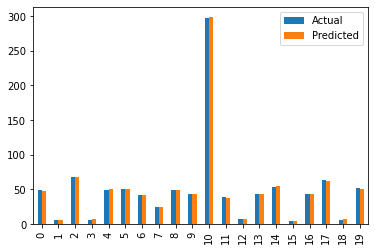

In [44]:
graph = data1.head(20)
graph.plot(kind='bar')